In [1]:
%load_ext autoreload
%autoreload 2

# Defining A Chemical Network 

In [2]:
system = {
    'duration': 0.005, 
    'resolution': 0.00005,
    'species': [
        ('E', 5000), 
        ('S', 10000), 
        ('ES', 0), 
        ('P', 100),
    ],
    'reactions': [
        (
            'k_r', 
            ((1, 'E'), (1, 'S')), 
            ((1, 'ES'), )
        ), 
        (
            'k_f', 
            ((1, 'ES'), ), 
            ((1, 'E'), (1, 'S'))
        ), 
        (
            'k_cat', 
            ((1, 'ES'), ), 
            ((1, 'E'), (1, 'P'))
        ), 
    ], 
    'variables': [
        ('k_r', 1.0), 
        ('k_f', 0.01), 
        ('k_cat', 800.0), 
    ], 
    'functions': [], 
    'targets': [
        'time', 
        'E',
        'S', 
        'ES', 
        'P', 
    ],
}

# Running A Single Trajectory 

In [3]:
%matplotlib inline
import pandas as pd
from collections import OrderedDict
from simulator import get_simulator
from simulate import simulate

In [19]:
run = get_simulator(system)
data = run(0, S=8000, k_cat=400)

existing cython code is identical...
ext module version: gillespie_41 41


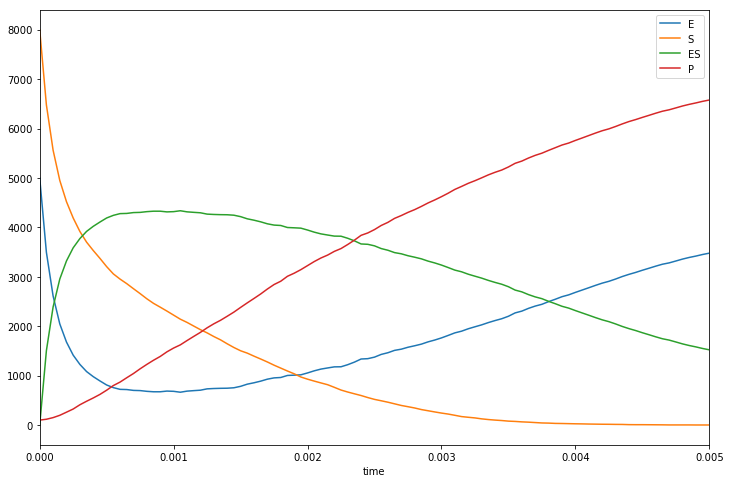

In [21]:
df = pd.DataFrame(OrderedDict((t, d) for t, d in zip(system['targets'], data)))
df.plot(x='time', kind='line', figsize=(12, 8))

# Running Many Trajectories 

In [22]:
pspace, data = simulate(system, batchsize=1000)

existing cython code is identical...
ext module version: gillespie_41 41


100%|██████████| 1000/1000 [00:02<00:00, 408.15it/s]


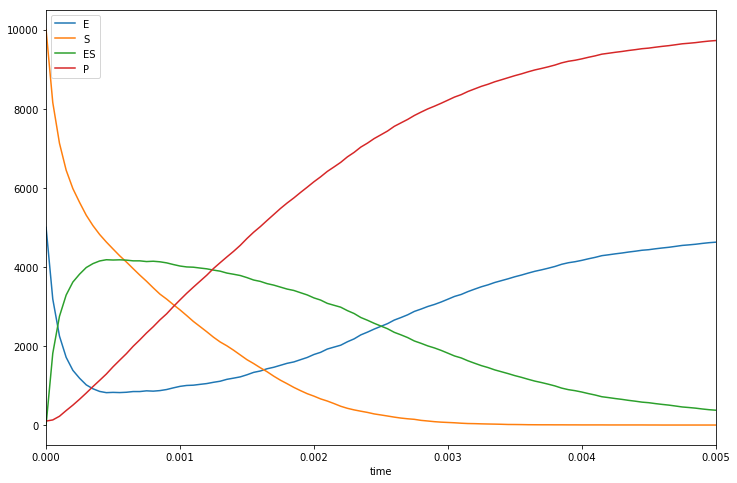

In [23]:
df = pd.DataFrame(OrderedDict((t, d) for t, d in zip(system['targets'], data[0][0])))
df.plot(x='time', kind='line', figsize=(12, 8))

# Adding Statistical Processing 

In [24]:
def statistics(location, targets, batch):
    time = batch[:, 0, :]
    data = batch[:, 1:, :]
    #print(location, batch.shape, time.shape, targets.shape, batch.mean(axis=0).shape)
    return ['time'] + [('Mean %s' % t) for t in targets[1:]], batch.mean(axis=0)

In [25]:
def dummystat(location, targets, batch):
    return ['whatever'], [10, 20, 30]

In [26]:
pspace, data = simulate(system, batchsize=1000)
targs, stats = statistics({}, system['targets'], data[0])
print(targs)
print(stats.shape)

existing cython code is identical...
ext module version: gillespie_41 41


100%|██████████| 1000/1000 [00:02<00:00, 409.31it/s]

['time', 'Mean E', 'Mean S', 'Mean ES', 'Mean P']
(5, 101)


In [27]:
pspace, data = simulate(system, processing=[statistics, dummystat], batchsize=1000)

existing cython code is identical...
ext module version: gillespie_41 41


100%|██████████| 1000/1000 [00:02<00:00, 404.32it/s]


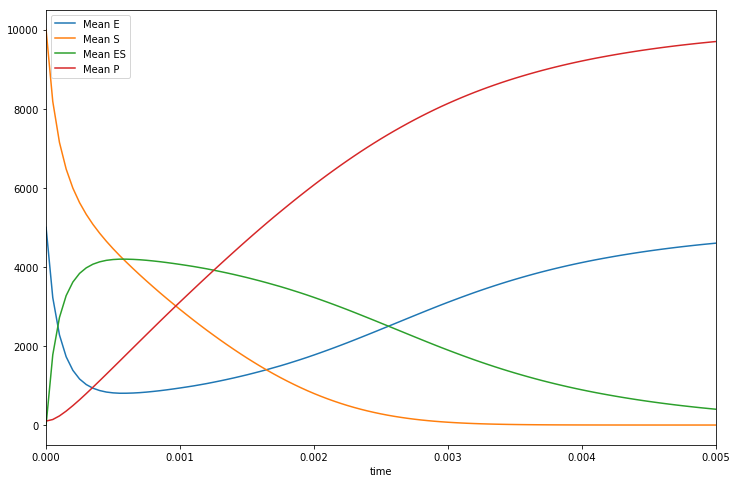

In [28]:
df = pd.DataFrame(OrderedDict((t, d) for t, d in zip(*data[0][0])))
df.plot(x='time', kind='line', figsize=(12, 8))

# Running A Parameter Scan 

In [29]:
axes = (
    ('E', (1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000)), 
    ('S', (1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000)), 
)
batchsize = 100
pspace, data = simulate(system, processing=[statistics], batchsize=batchsize, axes=axes)

existing cython code is identical...
ext module version: gillespie_41 41


100%|██████████| 100/100 [00:13<00:00,  7.31it/s]


In [30]:
pspace, len(pspace['E']), batchsize, len(data), len(data[0]), len(data[0][0]), data[0][0][1].shape

({'E': array([ 1000,  1000,  1000,  1000,  1000,  1000,  1000,  1000,  1000,
          1000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
          2000,  2000,  3000,  3000,  3000,  3000,  3000,  3000,  3000,
          3000,  3000,  3000,  4000,  4000,  4000,  4000,  4000,  4000,
          4000,  4000,  4000,  4000,  5000,  5000,  5000,  5000,  5000,
          5000,  5000,  5000,  5000,  5000,  6000,  6000,  6000,  6000,
          6000,  6000,  6000,  6000,  6000,  6000,  7000,  7000,  7000,
          7000,  7000,  7000,  7000,  7000,  7000,  7000,  8000,  8000,
          8000,  8000,  8000,  8000,  8000,  8000,  8000,  8000,  9000,
          9000,  9000,  9000,  9000,  9000,  9000,  9000,  9000,  9000,
         10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]),
  'S': array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
         10000,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
          9000, 10000,  1000,  2000,  3000,  

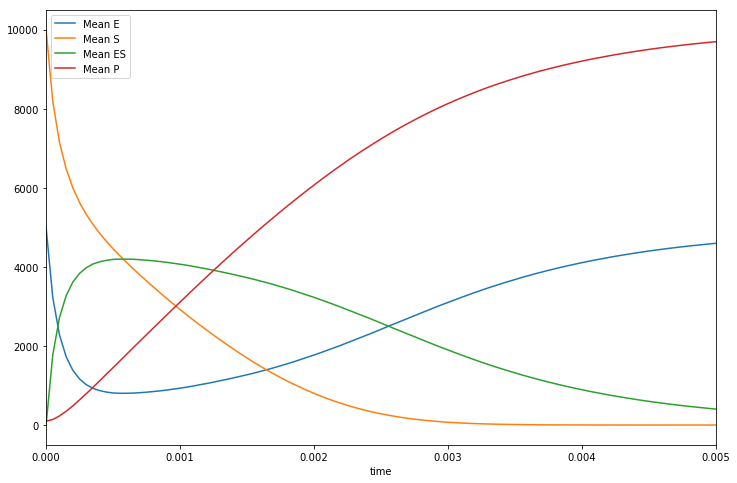

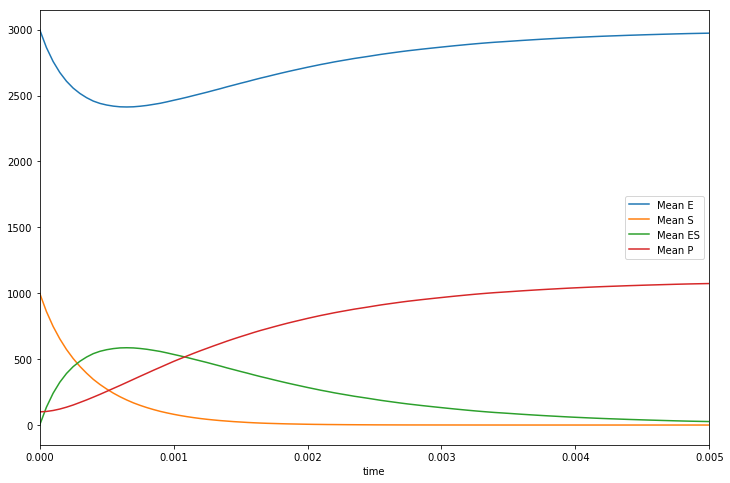

In [32]:
pd.DataFrame(OrderedDict((t, d) for t, d in zip(*data[49][0]))).plot(x='time', kind='line', figsize=(12, 8))
pd.DataFrame(OrderedDict((t, d) for t, d in zip(*data[20][0]))).plot(x='time', kind='line', figsize=(12, 8))